<a href="https://colab.research.google.com/github/ssabrut/Emotions-dataset-for-NLP/blob/main/Emotions_dataset_for_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# from google.colab import files

# uploaded = files.upload()
# !pip install -q kaggle

In [2]:
# !mkdir ~/.kaggle
# !mv kaggle.json ~/.kaggle
# !chmod 600 ~/.kaggle/kaggle.json

In [3]:
# !kaggle datasets download -d praveengovi/emotions-dataset-for-nlp

In [4]:
# import os
# import zipfile

# local_zip = '/content/emotions-dataset-for-nlp.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('/content')
# zip_ref.close()

In [5]:
import csv

train_path = '/content/train.txt'
train_sentences, train_label = [], []

with open(train_path, 'r', newline = '') as train_data:
  train_reader = csv.reader(train_data, delimiter = ';')

  for train, label in train_reader:
    train_sentences.append(train)
    train_label.append(label)

In [6]:
validation_path = '/content/val.txt'
validation_sentences, validation_label = [], []

with open(validation_path, 'r', newline = '') as val_data:
  val_reader = csv.reader(val_data, delimiter = ';')

  for val, label in val_reader:
    validation_sentences.append(val)
    validation_label.append(label)

In [7]:
import pandas as pd

train_df = pd.DataFrame(list(zip(train_sentences, train_label)), columns = ['sentence', 'label'])
train_df.head(10)

,sentence,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
5,ive been feeling a little burdened lately wasn...,sadness
6,ive been taking or milligrams or times recomme...,surprise
7,i feel as confused about life as a teenager or...,fear
8,i have been with petronas for years i feel tha...,joy
9,i feel romantic too,love


In [8]:
print(train_df.shape)
print(train_df.isnull().sum())

(16000, 2)
sentence    0
label       0
dtype: int64


In [9]:
validation_df = pd.DataFrame(list(zip(validation_sentences, validation_label)), columns = ['sentence', 'label'])
validation_df.head(10)

,sentence,label
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy
5,i start to feel more appreciative of what god ...,joy
6,i am feeling more confident that we will be ab...,joy
7,i feel incredibly lucky just to be able to tal...,joy
8,i feel less keen about the army every day,joy
9,i feel dirty and ashamed for saying that,sadness


In [10]:
print(validation_df.shape)
print(validation_df.isnull().sum())

(2000, 2)
sentence    0
label       0
dtype: int64


In [11]:
df = pd.concat([train_df, validation_df])
df.head(10)

,sentence,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
5,ive been feeling a little burdened lately wasn...,sadness
6,ive been taking or milligrams or times recomme...,surprise
7,i feel as confused about life as a teenager or...,fear
8,i have been with petronas for years i feel tha...,joy
9,i feel romantic too,love


In [12]:
print(df.shape)
print(df.isnull().sum())

(18000, 2)
sentence    0
label       0
dtype: int64


In [13]:
import re

def remove_hyperlinks(text):
  sentence = re.sub(r'www?:\/\/.*[\r\n]*', '', text)
  sentence = re.sub(r'http?:\/\/.*[\r\n]*', '', sentence)
  return re.sub(r'https?:\/\/.*[\r\n]*', '', sentence)

def remove_currencies(text):
  return re.sub(r'[\$\d+\d+\$]', '', text)

def remove_number(text):
  return re.sub(r'\d+', '', text)

df['sentence'] = df['sentence'].apply(lambda x: remove_hyperlinks(x.lower()))
df['sentence'] = df['sentence'].apply(lambda x: remove_currencies(x))
df['sentence'] = df['sentence'].apply(lambda x: remove_number(x))
df.head(10)

,sentence,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
5,ive been feeling a little burdened lately wasn...,sadness
6,ive been taking or milligrams or times recomme...,surprise
7,i feel as confused about life as a teenager or...,fear
8,i have been with petronas for years i feel tha...,joy
9,i feel romantic too,love


In [14]:
import string

def remove_punctuation(text):
  return ''.join([word for word in text if word not in string.punctuation])

def tokenize(text):
  return re.split(r'\W+', text)

df['sentence'] = df['sentence'].apply(lambda x: remove_punctuation(x))
df['sentence'] = df['sentence'].apply(lambda x: tokenize(x))
df.head(10)

,sentence,label
0,"[i, didnt, feel, humiliated]",sadness
1,"[i, can, go, from, feeling, so, hopeless, to, ...",sadness
2,"[im, grabbing, a, minute, to, post, i, feel, g...",anger
3,"[i, am, ever, feeling, nostalgic, about, the, ...",love
4,"[i, am, feeling, grouchy]",anger
5,"[ive, been, feeling, a, little, burdened, late...",sadness
6,"[ive, been, taking, or, milligrams, or, times,...",surprise
7,"[i, feel, as, confused, about, life, as, a, te...",fear
8,"[i, have, been, with, petronas, for, years, i,...",joy
9,"[i, feel, romantic, too]",love


In [15]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stopword = stopwords.words('english')
def remove_stopword(text):
  return [word for word in text if word not in stopword]

df['sentence'] = df['sentence'].apply(lambda x: remove_stopword(x))
df.head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,sentence,label
0,"[didnt, feel, humiliated]",sadness
1,"[go, feeling, hopeless, damned, hopeful, aroun...",sadness
2,"[im, grabbing, minute, post, feel, greedy, wrong]",anger
3,"[ever, feeling, nostalgic, fireplace, know, st...",love
4,"[feeling, grouchy]",anger
5,"[ive, feeling, little, burdened, lately, wasnt...",sadness
6,"[ive, taking, milligrams, times, recommended, ...",surprise
7,"[feel, confused, life, teenager, jaded, year, ...",fear
8,"[petronas, years, feel, petronas, performed, w...",joy
9,"[feel, romantic]",love


In [16]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
def lemmatize(text):
  return ' '.join([lemmatizer.lemmatize(word) for word in text])

df['sentence'] = df['sentence'].apply(lambda x: lemmatize(x))
df.head(10)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,sentence,label
0,didnt feel humiliated,sadness
1,go feeling hopeless damned hopeful around some...,sadness
2,im grabbing minute post feel greedy wrong,anger
3,ever feeling nostalgic fireplace know still pr...,love
4,feeling grouchy,anger
5,ive feeling little burdened lately wasnt sure,sadness
6,ive taking milligram time recommended amount i...,surprise
7,feel confused life teenager jaded year old man,fear
8,petronas year feel petronas performed well mad...,joy
9,feel romantic,love


In [17]:
label = pd.get_dummies(df['label'])
new_df = pd.concat([df, label], axis = 1)
new_df = new_df.drop(columns = 'label')
new_df.head(10)

,sentence,anger,fear,joy,love,sadness,surprise
0,didnt feel humiliated,0,0,0,0,1,0
1,go feeling hopeless damned hopeful around some...,0,0,0,0,1,0
2,im grabbing minute post feel greedy wrong,1,0,0,0,0,0
3,ever feeling nostalgic fireplace know still pr...,0,0,0,1,0,0
4,feeling grouchy,1,0,0,0,0,0
5,ive feeling little burdened lately wasnt sure,0,0,0,0,1,0
6,ive taking milligram time recommended amount i...,0,0,0,0,0,1
7,feel confused life teenager jaded year old man,0,1,0,0,0,0
8,petronas year feel petronas performed well mad...,0,0,1,0,0,0
9,feel romantic,0,0,0,1,0,0


In [18]:
sentence = new_df['sentence'].values
label = new_df[['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']].values

In [19]:
from sklearn.model_selection import train_test_split

sentence_train, sentence_test, label_train, label_test = train_test_split(sentence, label, test_size = 0.25, random_state = 0)

In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

num_words = 10000
oov_token = 'x'
filters = '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
output_dim = 64

tokenizer = Tokenizer(num_words = num_words, oov_token = oov_token, filters = filters)
tokenizer.fit_on_texts(sentence_train)
tokenizer.fit_on_texts(sentence_test)

sequences_train = tokenizer.texts_to_sequences(sentence_train)
sequences_val = tokenizer.texts_to_sequences(sentence_test)

padded_train = pad_sequences(sequences_train)
padded_val = pad_sequences(sequences_val)

In [21]:
print('Train pad shape: ', padded_train.shape)
print('Test pad shape: ', padded_val.shape)
print('Train label shape: ', label_train.shape)
print('Test label shape: ', label_test.shape)

Train pad shape:  (13500, 35)
Test pad shape:  (4500, 34)
Train label shape:  (13500, 6)
Test label shape:  (4500, 6)


In [22]:
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import Sequential

model = Sequential([
  Embedding(input_dim = num_words, output_dim = output_dim),
  LSTM(128),
  Dense(128, activation = 'relu'),
  Dropout(0.5),
  Dense(6, activation = 'softmax')
])

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          640000    
_________________________________________________________________
lstm (LSTM)                  (None, 128)               98816     
_________________________________________________________________
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 774       
Total params: 756,102
Trainable params: 756,102
Non-trainable params: 0
_________________________________________________________________


In [23]:
from keras.callbacks import Callback

class Callback(Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if (logs.get('accuracy') > 0.98):
      self.model.stop_training = True

callbacks = Callback()

In [24]:
history = model.fit(
    padded_train, label_train,
    epochs = 100,
    validation_data = (padded_val, label_test),
    callbacks = [callbacks],
    shuffle = False
)

Epoch 1/100
422/422 [==============================] - 10s 16ms/step - loss: 1.2221 - accuracy: 0.5105 - val_loss: 0.6409 - val_accuracy: 0.7938
Epoch 2/100
422/422 [==============================] - 6s 15ms/step - loss: 0.3608 - accuracy: 0.8888 - val_loss: 0.3182 - val_accuracy: 0.8951
Epoch 3/100
422/422 [==============================] - 6s 15ms/step - loss: 0.1427 - accuracy: 0.9519 - val_loss: 0.3250 - val_accuracy: 0.9053
Epoch 4/100
422/422 [==============================] - 6s 15ms/step - loss: 0.0904 - accuracy: 0.9710 - val_loss: 0.3205 - val_accuracy: 0.9073
Epoch 5/100
422/422 [==============================] - 7s 16ms/step - loss: 0.0644 - accuracy: 0.9798 - val_loss: 0.3584 - val_accuracy: 0.9118
Epoch 6/100
422/422 [==============================] - 6s 15ms/step - loss: 0.0563 - accuracy: 0.9809 - val_loss: 0.4614 - val_accuracy: 0.9051


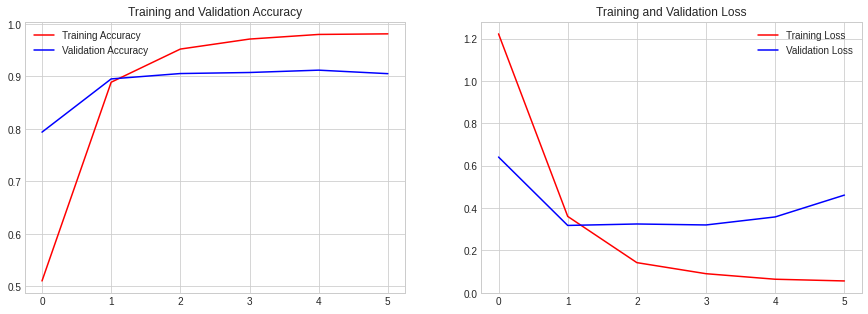

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn-whitegrid')

def plot_acc(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  epochs = range(len(acc))
  plt.subplot(1, 2, 1)
  acc_plot, = plt.plot(epochs, acc, 'r')
  val_acc_plot, = plt.plot(epochs, val_acc, 'b')
  plt.title('Training and Validation Accuracy')
  plt.legend([acc_plot, val_acc_plot], ['Training Accuracy', 'Validation Accuracy'])

def plot_loss(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(loss))
  plt.subplot(1, 2, 2)
  loss_plot, = plt.plot(epochs, loss, 'r')
  val_loss_plot, = plt.plot(epochs, val_loss, 'b')
  plt.title('Training and Validation Loss')
  plt.legend([loss_plot, val_loss_plot], ['Training Loss', 'Validation Loss'])

def plot_history(history):
  plt.figure(figsize = (15, 5))
  plot_acc(history)
  plot_loss(history)
  
plot_history(history)

In [26]:
import numpy as np

def predict_emotion(sentence, model = model):
  text = remove_hyperlinks(sentence)
  text = remove_currencies(text)
  text = remove_number(text)
  text = remove_punctuation(text)
  text = tokenize(text)
  text = remove_stopword(text)
  text = lemmatize(text)
  sequence = tokenizer.texts_to_sequences([text])
  test = pad_sequences(sequence)
  predict_array = model.predict(test)[0]

  df = pd.DataFrame(predict_array)
  df = df.rename({0: 'probability'}, axis = 1)
  prod = ['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']
  df['label'] = prod
  df = df[['label', 'probability']]

  predict_label = np.argmax(model.predict(test), axis = 1)[0]

  if predict_label == 0:
      predict_product = 'Anger'
  elif predict_label == 1:
      predict_product = 'Fear'
  elif predict_label == 2:
      predict_product = 'Joy'
  elif predict_label == 3:
      predict_product = 'Love'
  elif predict_label == 4:
      predict_product = 'Sadness'
  else:
      predict_product = 'Surprise'

  return predict_product, df

In [27]:
sentence = ['im feeling rather rotten so im not very ambitious right now',
            'im updating my blog because i feel shitty',
            'i left with my bouquet of red and yellow tulips under my arm feeling slightly more optimistic than when i arrived',
            'i cant walk into a shop anywhere where i do not feel uncomfortable']

for text in sentence:
  label, df = predict_emotion(text)
  print('"' + text + '"')
  print("The sentence is detected as " + label)
  print('\n', df.sort_values(by = 'probability', ascending = False), '\n\n')

"im feeling rather rotten so im not very ambitious right now"
The sentence is detected as Sadness

       label   probability
4   sadness  9.999785e-01
0     anger  1.414156e-05
1      fear  3.961971e-06
2       joy  3.202510e-06
3      love  1.395958e-07
5  surprise  5.028284e-09 


"im updating my blog because i feel shitty"
The sentence is detected as Sadness

       label   probability
4   sadness  9.999944e-01
2       joy  5.209213e-06
1      fear  2.097832e-07
0     anger  1.434009e-07
3      love  6.037452e-10
5  surprise  3.128825e-11 


"i left with my bouquet of red and yellow tulips under my arm feeling slightly more optimistic than when i arrived"
The sentence is detected as Joy

       label   probability
2       joy  9.999994e-01
4   sadness  4.887818e-07
3      love  1.253953e-07
1      fear  1.312109e-09
5  surprise  1.942213e-10
0     anger  7.720993e-11 


"i cant walk into a shop anywhere where i do not feel uncomfortable"
The sentence is detected as Fear

       lab